### 1. (a)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
splits = []
for i in range(4):
    df_train, df_test = train_test_split(df, test_size=(0.5 - (0.1 * i)), random_state=42)
    df_test, df_val = train_test_split(df_test, test_size=(1.0 / (5 - i)))
    splits.append([df_train, df_val, df_test])
splits[3][1].head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
23,9,119,80,35,0,29.0,0.263,29,1
250,9,106,52,0,0,31.2,0.380,42,0
470,1,144,82,40,0,41.3,0.607,28,0
716,3,173,78,39,185,33.8,0.970,31,1
579,2,197,70,99,0,34.7,0.575,62,1


In [14]:
# eda
print(splits[0][0].shape)
print(splits[0][1].shape)
print(splits[0][2].shape)

(384, 9)
(77, 9)
(307, 9)


### 1. (b)

In [9]:
def sigmoid(z):   
    return 1/ (1+np.exp(-z))

In [15]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = float(0)
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [81]:
def propagate(w, b, X, Y):    
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = - np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m
    dw=np.dot(X,(A-Y).T)/m
    db=np.sum(A-Y)/m
    assert(dw.shape==w.shape)
    assert(db.dtype==float)
    cost=np.squeeze(cost)
    assert(cost.shape==())
    cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [85]:
def optimize(w, b, X, Y, num_iterations, learning_rate, stopping_param, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        
        grads,cost=propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        costs.append(cost)
        if i % 10 == 0:
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
        if i >= 10 and (costs[-2] - costs[-1])/(1.0 * costs[-1]) < stopping_param:
            print(f"Early stopping at iteration {i}.")
            break
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

In [86]:
alphas = [0.0001, 0.1]
rhos = [0.001, 0.01]
epochs = [50, 100]

In [96]:
results = []
for split, pct in zip(splits, [0.5, 0.6, 0.7, 0.8]):
    df_train, df_val, df_test = split
    x_train = df_train.drop("Outcome", axis=1).to_numpy().T
    y_train = df_train["Outcome"].to_numpy().T
    x_val = df_val.drop("Outcome", axis=1).to_numpy().T
    y_val = df_val["Outcome"].to_numpy().T
    x_test = df_test.drop("Outcome", axis=1).to_numpy().T
    y_test = df_test["Outcome"].to_numpy().T

    dim, m = x_train.shape

    for alpha in alphas:
        for rho in rhos:
            for epoch in epochs:
                w, b = initialize_with_zeros(dim)
                params, grads, costs = optimize(w, b, x_train, y_train, epoch, alpha, rho)
                w = params["w"]
                b = params["b"]
                result = {"w": w,
                          "b": b,
                          "costs": costs,
                          "pct": pct,
                          "alpha": alpha,
                          "rho": rho,
                          "epoch": epoch,
                          "x_train": x_train,
                          "x_val": x_val,
                          "x_test": x_test,
                          "y_train": y_train,
                          "y_val": y_val,
                          "y_test": y_test}
                results.append(result)
                print(f"pct = {pct}, alpha = {alpha}, rho = {rho}, epoch = {epoch}")
                print(f"w[0][0] = {w[0][0]}, b = {b}, final cost = {costs[-1]}")
                print(costs)
                print()


Early stopping at iteration 15.
pct = 0.5, alpha = 0.0001, rho = 0.001, epoch = 50
w[0][0] = 0.00018221356909205974, b = -9.649007843673326e-05, final cost = 0.6563433127710918
[array(0.69314718), array(0.67797389), array(0.67290746), array(0.66949255), array(0.66702982), array(0.66518074), array(0.66373056), array(0.66254203), array(0.66152724), array(0.66062972), array(0.65981296), array(0.65905324), array(0.65833503), array(0.65764811), array(0.65698572), array(0.65634331)]

Early stopping at iteration 15.
pct = 0.5, alpha = 0.0001, rho = 0.001, epoch = 100
w[0][0] = 0.00018221356909205974, b = -9.649007843673326e-05, final cost = 0.6563433127710918
[array(0.69314718), array(0.67797389), array(0.67290746), array(0.66949255), array(0.66702982), array(0.66518074), array(0.66373056), array(0.66254203), array(0.66152724), array(0.66062972), array(0.65981296), array(0.65905324), array(0.65833503), array(0.65764811), array(0.65698572), array(0.65634331)]

Early stopping at iteration 10.
p

C:\Users\Vemor\AppData\Local\Temp\ipykernel_2208\4003463766.py:4: RuntimeWarning: divide by zero encountered in log
  cost = - np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m
C:\Users\Vemor\AppData\Local\Temp\ipykernel_2208\4003463766.py:4: RuntimeWarning: invalid value encountered in multiply
  cost = - np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m
C:\Users\Vemor\AppData\Local\Temp\ipykernel_2208\2464134125.py:2: RuntimeWarning: overflow encountered in exp
  return 1/ (1+np.exp(-z))
C:\Users\Vemor\AppData\Local\Temp\ipykernel_2208\4003463766.py:4: RuntimeWarning: divide by zero encountered in log
  cost = - np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m
C:\Users\Vemor\AppData\Local\Temp\ipykernel_2208\4003463766.py:4: RuntimeWarning: invalid value encountered in multiply
  cost = - np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m
C:\Users\Vemor\AppData\Local\Temp\ipykernel_2208\2464134125.py:2: RuntimeWarning: overflow encountered in exp
  return 1/ (1+np.exp(-z))
C:\Users\Vemor\AppData\Local\Temp\ipykernel_2208\4

Early stopping at iteration 17.
pct = 0.8, alpha = 0.0001, rho = 0.001, epoch = 50
w[0][0] = 0.00021285080152987578, b = -0.00010798534052996309, final cost = 0.6560632388168985
[array(0.69314718), array(0.67415888), array(0.67097291), array(0.66880909), array(0.66712233), array(0.66574776), array(0.66458211), array(0.66355786), array(0.66263096), array(0.66177277), array(0.66096462), array(0.6601943), array(0.6594538), array(0.65873784), array(0.65804287), array(0.65736647), array(0.65670699), array(0.65606324)]

Early stopping at iteration 17.
pct = 0.8, alpha = 0.0001, rho = 0.001, epoch = 100
w[0][0] = 0.00021285080152987578, b = -0.00010798534052996309, final cost = 0.6560632388168985
[array(0.69314718), array(0.67415888), array(0.67097291), array(0.66880909), array(0.66712233), array(0.66574776), array(0.66458211), array(0.66355786), array(0.66263096), array(0.66177277), array(0.66096462), array(0.6601943), array(0.6594538), array(0.65873784), array(0.65804287), array(0.65736647)

### 1. (c)

In [97]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0    
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [99]:
stats = []
for result in results:
    w = result["w"]
    b = result["b"]
    costs = result["costs"]
    X_test = result["x_test"]
    X_train = result["x_train"]
    Y_test = result["y_test"]
    Y_train = result["y_train"]
    pct = result["pct"]
    alpha = result["alpha"]
    rho = result["rho"]
    epoch = result["epoch"]

    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    train_accuracy = (100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100)
    test_accuracy = (100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100)

    print(f"pct = {pct}, alpha = {alpha}, rho = {rho}, epoch = {epoch}")
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    print()
    
    d = {"train_accuracy": train_accuracy,
         "test_accuracy": test_accuracy,
         "w" : w, 
         "b" : b,
         "costs": costs,
         "pct": pct,
         "alpha": alpha,
         "rho": rho,
         "epoch": rho}
    stats.append(d)


pct = 0.5, alpha = 0.0001, rho = 0.001, epoch = 50
train accuracy: 65.36458333333333 %
test accuracy: 63.843648208469055 %

pct = 0.5, alpha = 0.0001, rho = 0.001, epoch = 100
train accuracy: 65.36458333333333 %
test accuracy: 63.843648208469055 %

pct = 0.5, alpha = 0.0001, rho = 0.01, epoch = 50
train accuracy: 65.625 %
test accuracy: 63.843648208469055 %

pct = 0.5, alpha = 0.0001, rho = 0.01, epoch = 100
train accuracy: 65.625 %
test accuracy: 63.843648208469055 %

pct = 0.5, alpha = 0.1, rho = 0.001, epoch = 50
train accuracy: 38.020833333333336 %
test accuracy: 37.78501628664495 %

pct = 0.5, alpha = 0.1, rho = 0.001, epoch = 100
train accuracy: 48.958333333333336 %
test accuracy: 47.55700325732899 %

pct = 0.5, alpha = 0.1, rho = 0.01, epoch = 50
train accuracy: 38.020833333333336 %
test accuracy: 37.78501628664495 %

pct = 0.5, alpha = 0.1, rho = 0.01, epoch = 100
train accuracy: 48.958333333333336 %
test accuracy: 47.55700325732899 %

pct = 0.6, alpha = 0.0001, rho = 0.001, ep

C:\Users\Vemor\AppData\Local\Temp\ipykernel_2208\2464134125.py:2: RuntimeWarning: overflow encountered in exp
  return 1/ (1+np.exp(-z))


### 1. (d)

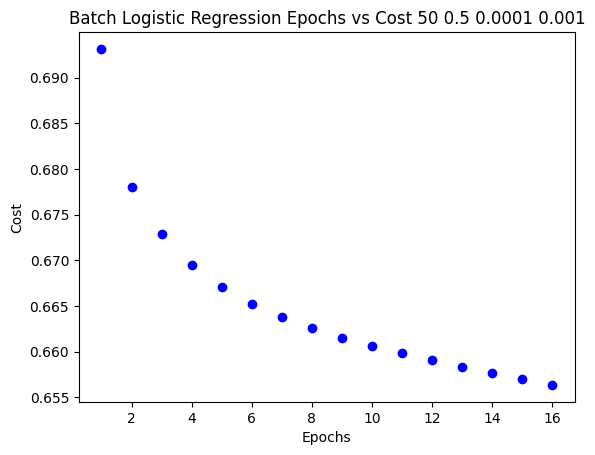

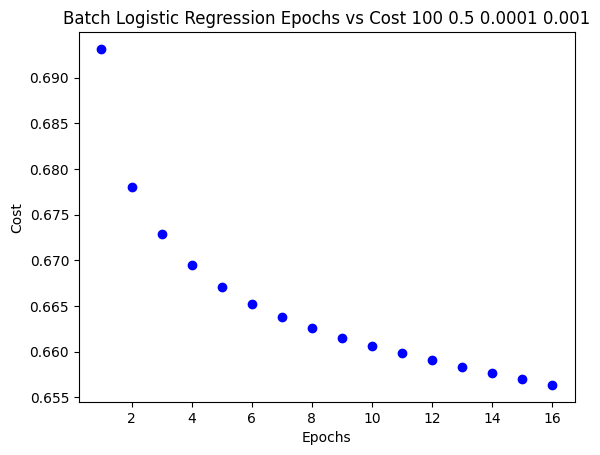

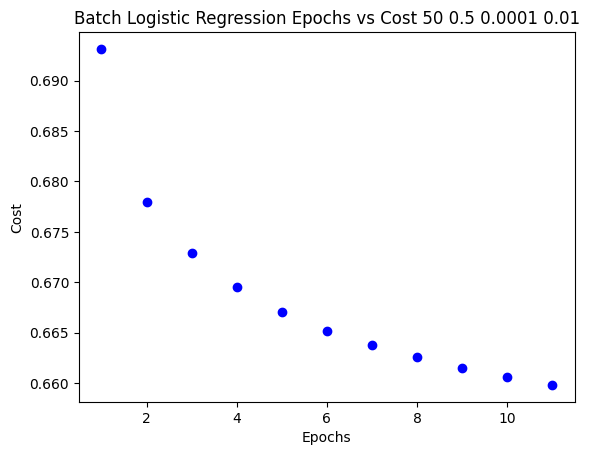

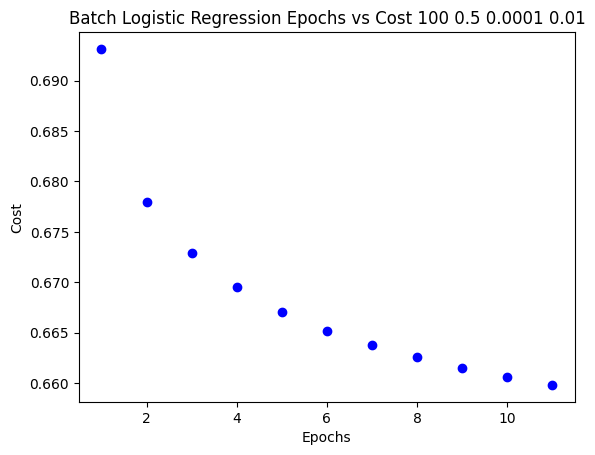

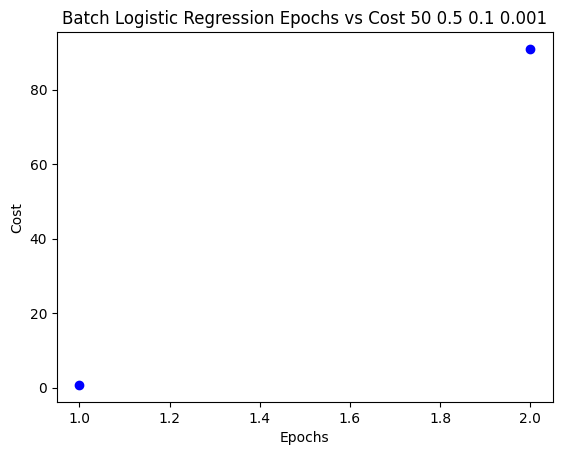

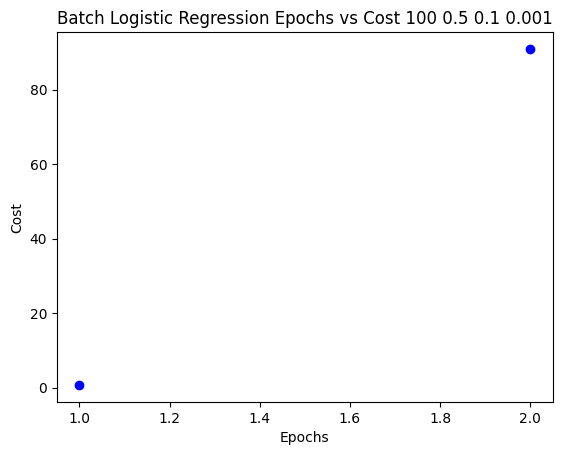

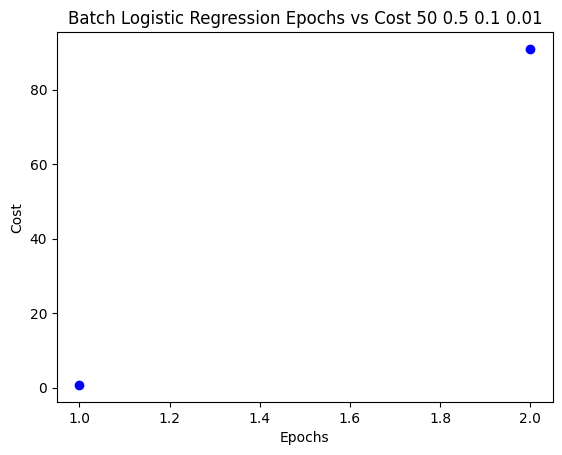

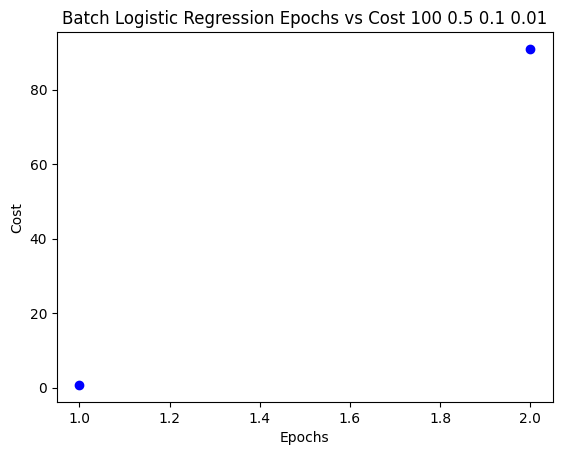

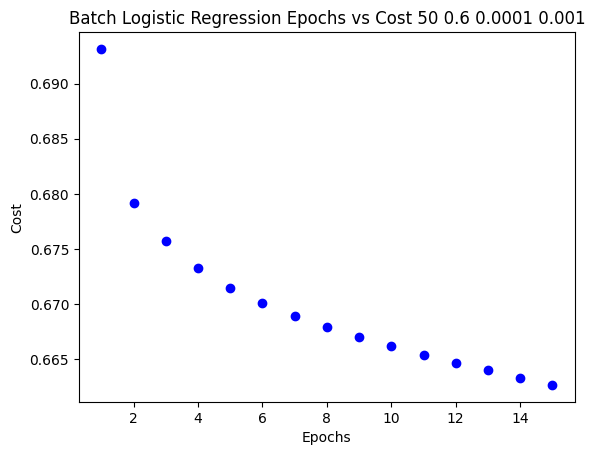

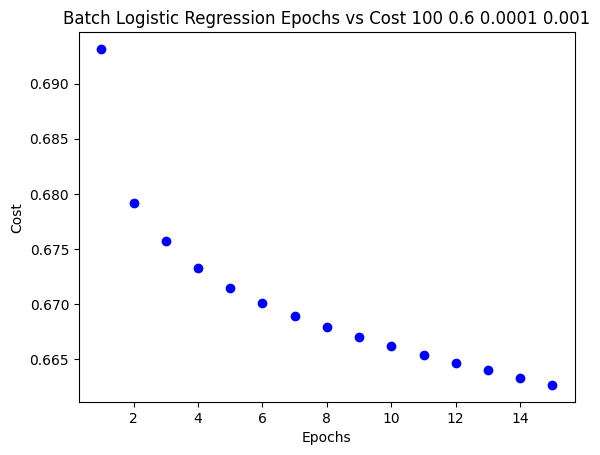

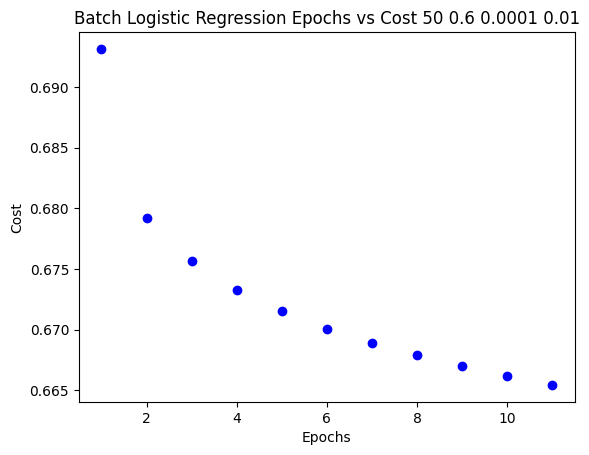

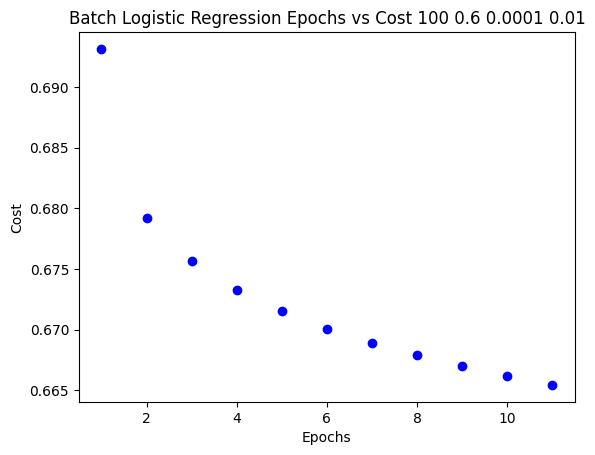

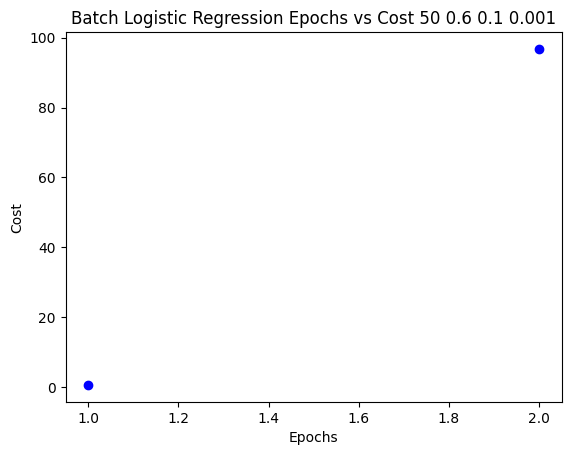

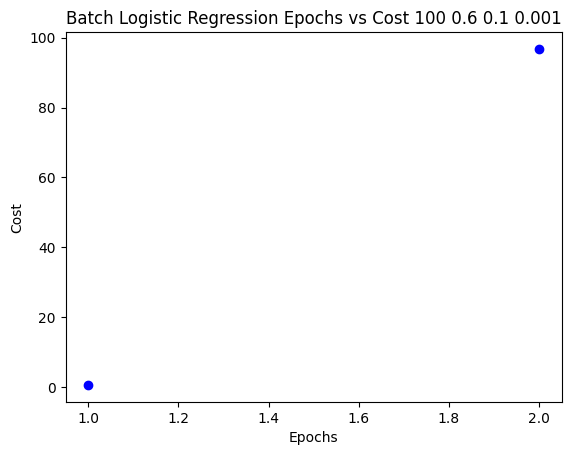

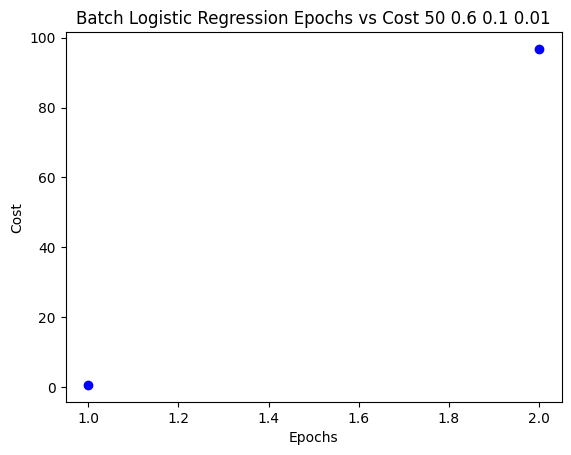

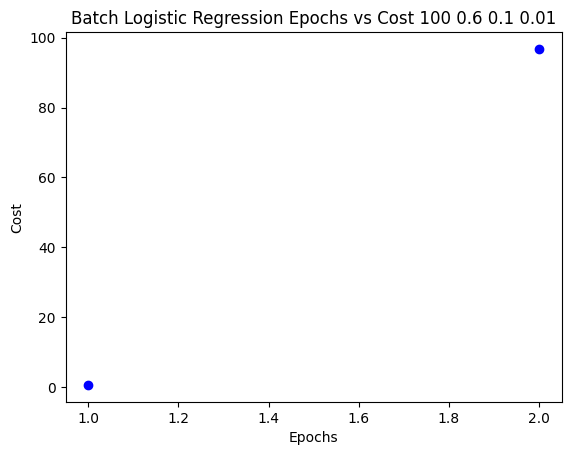

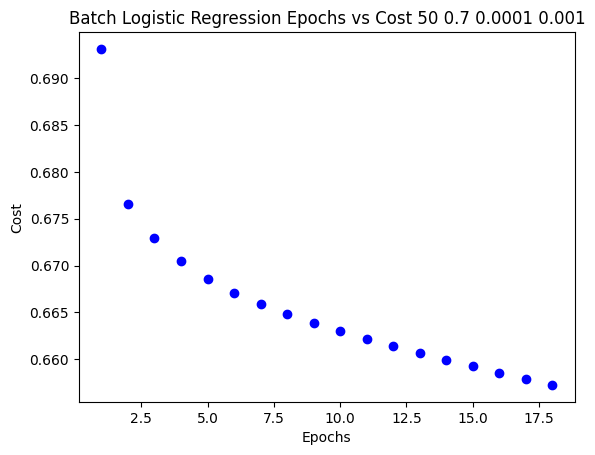

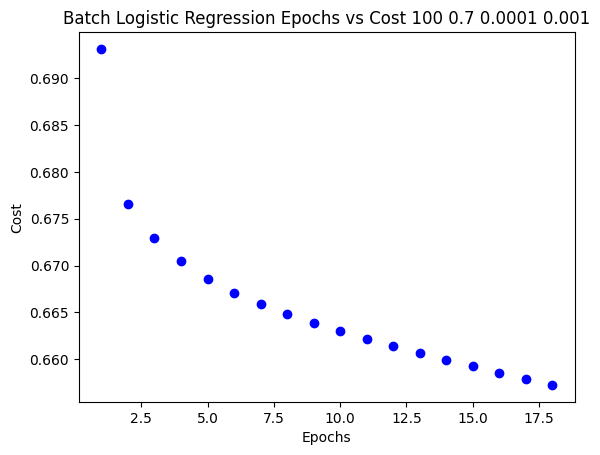

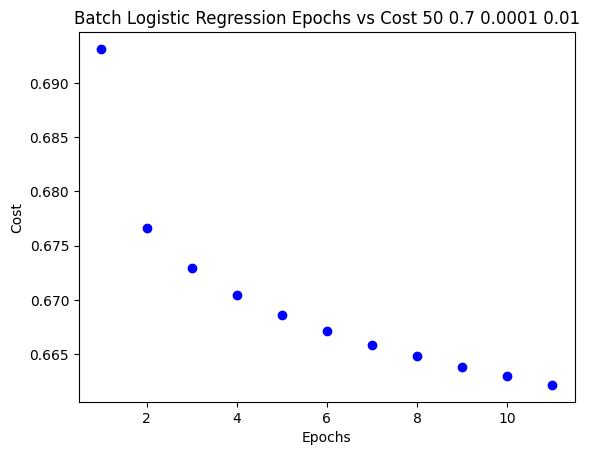

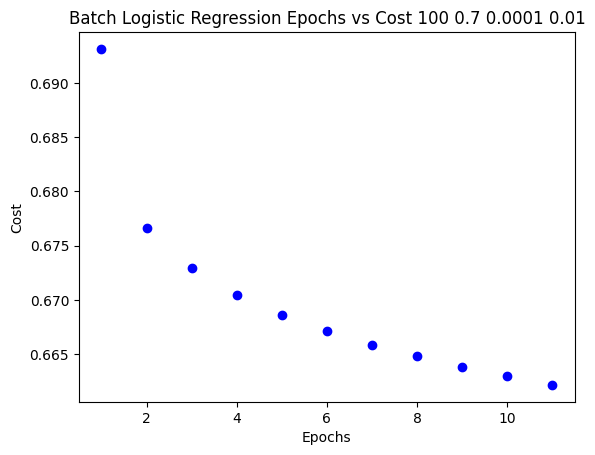

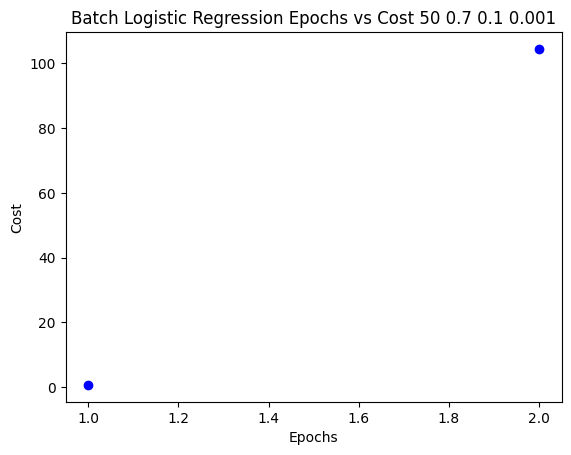

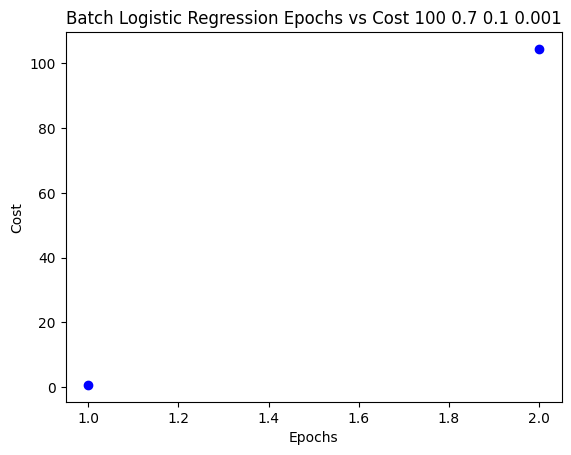

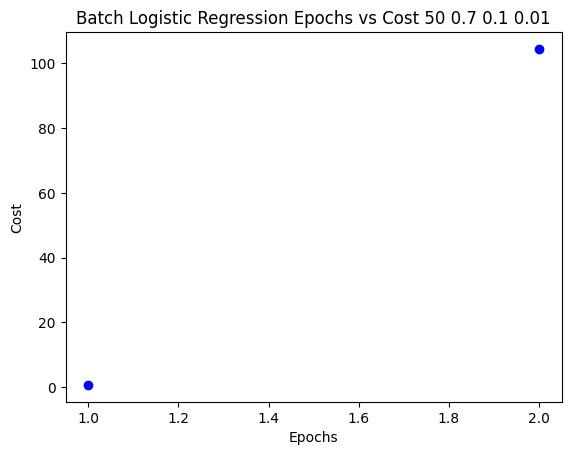

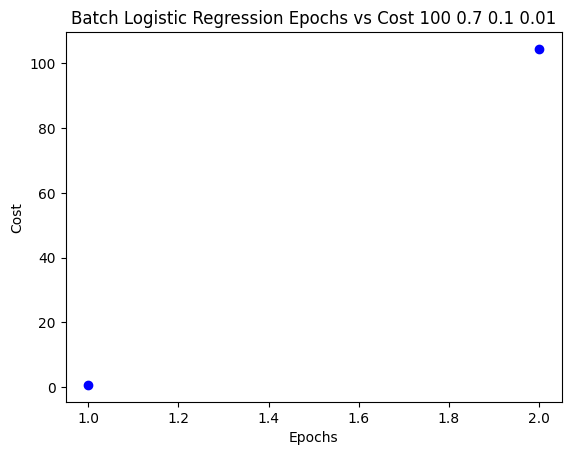

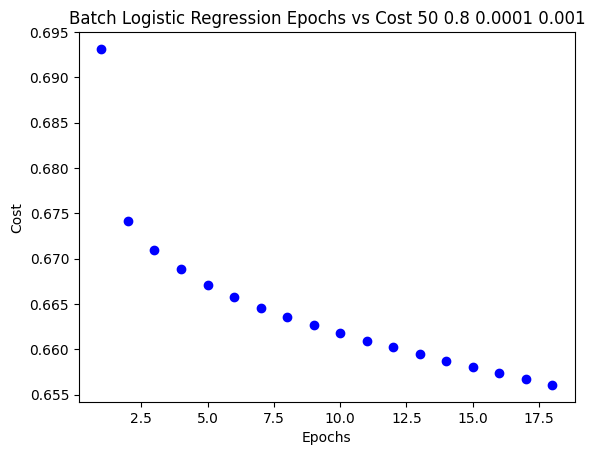

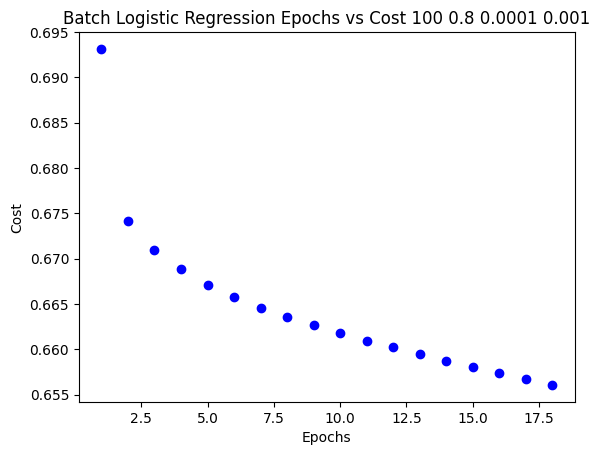

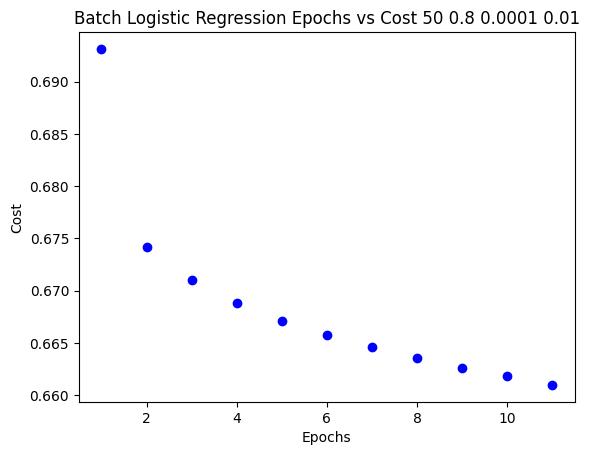

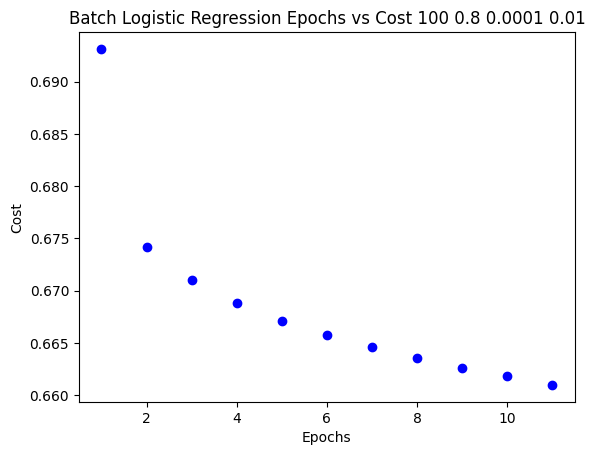

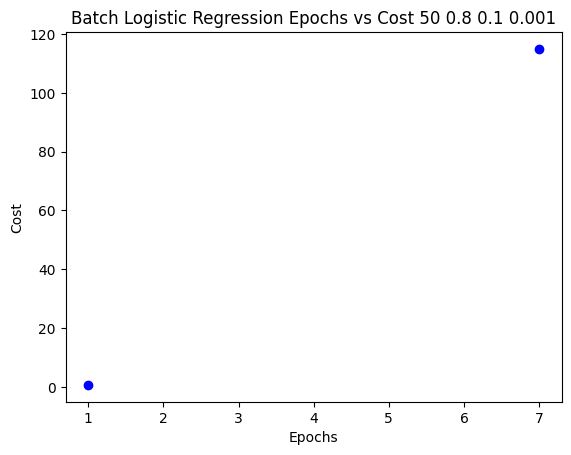

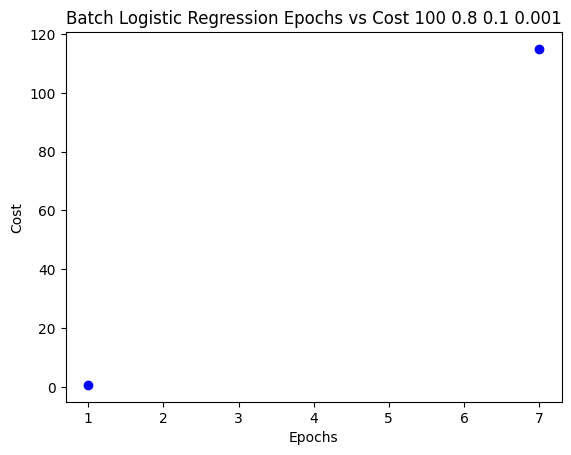

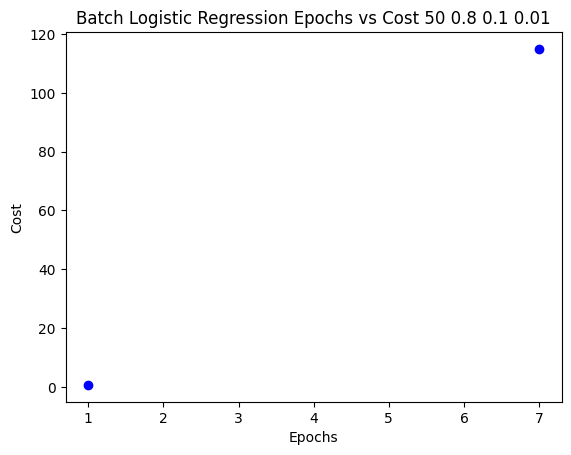

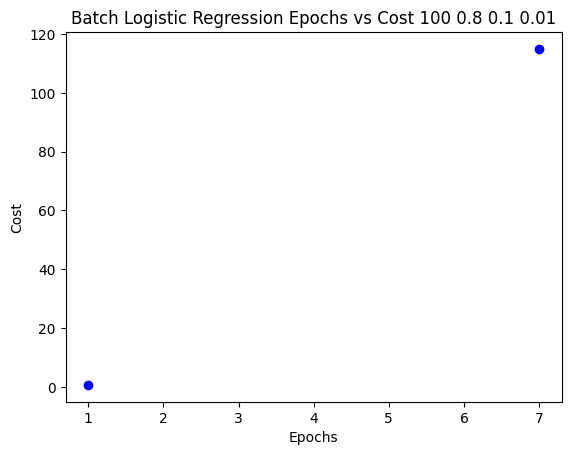

In [101]:
PLOTSDIR = "plots/"

for result in results:
    epochs = []
    costs = result["costs"]
    epoch = result["epoch"]
    pct = result["pct"]
    alpha = result["alpha"]
    rho = result["rho"]
    ctr = 1
    for cost in costs:
        epochs.append(ctr)
        ctr += 1
    plt.scatter(epochs, costs, color='blue', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title(f'Batch Logistic Regression Epochs vs Cost {epoch} {pct} {alpha} {rho}')
    plt.savefig(f'{PLOTSDIR}batch_lr_epochs_vs_cost_{epoch}_{pct}_{alpha}_{rho}.png')
    plt.show()

### 2.